In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
env = gym.make('FrozenLake-v0')

In [4]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [5]:
arr_rewards = []

In [6]:
state_size = env.observation_space.n
action_size = env.action_space.n
(state_size, action_size)

(16, 4)

In [8]:
# Initialize Q table
qtable = np.zeros((state_size, action_size))

episodes_count = 15000
lr = 0.6                  # learning rate
max_steps_count = 100         # Max steps the game should run or else end the session
gamma = 0.95                  # Discount rate (on future reward)

# Exploration Parameters
max_epsilon = 1.0
min_epsilon = 0.01             
epsilon = 1.0                 # Initial epsilon (Exploration probability)
decay_rate = 0.005            # decay rate for epsilon (exponentially decrease exploration)

In [9]:
rewards = [] # List of total reward in each episode

for episode in range(episodes_count):
    state = env.reset()
    episode_reward_sum = 0
    
    for step in range(max_steps_count):
        action = None
        
        exploration_prob = np.random.uniform()
        
        if exploration_prob <= epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(qtable[state, :])
        
        new_state, reward, done, info = env.step(action)

        qtable[state, action] = qtable[state, action] + \
                                    lr * (reward + (gamma * np.max(qtable[new_state, :])) - qtable[state, action])
        
        state = new_state
        episode_reward_sum += reward
        
        # if current game session has finished (won or dead)
        if done:
            break
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    if episode % 30 == 0:
        rewards.append(episode_reward_sum)

In [10]:
print(qtable)
print(sum(rewards)/ episodes_count)

[[9.18879648e-02 7.51418404e-02 1.32239392e-01 4.16827076e-02]
 [4.68138771e-03 1.14804276e-02 3.60453315e-03 9.00759765e-02]
 [2.88814955e-02 3.11071299e-02 2.43591746e-02 7.23330814e-02]
 [9.51403963e-03 1.92417876e-02 1.31813870e-02 5.37698311e-02]
 [1.63255098e-01 3.92863701e-02 1.18677854e-02 2.69684706e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.63818686e-02 5.34215354e-04 2.85276981e-03 1.10866960e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.10638989e-02 5.89144419e-02 4.58306171e-02 1.35595539e-01]
 [1.20257255e-02 6.17606859e-02 3.56709425e-02 2.63840261e-02]
 [1.66211811e-02 1.28440166e-02 9.65438240e-03 1.30264804e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.08575908e-01 1.27321986e-01 4.93701202e-01 2.21871307e-01]
 [3.19385909e-01 3.26183494e-01 3.02507224e-01 8.94894844e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

In [11]:
arr_rewards.append(rewards)

In [12]:
arr_rewards

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,

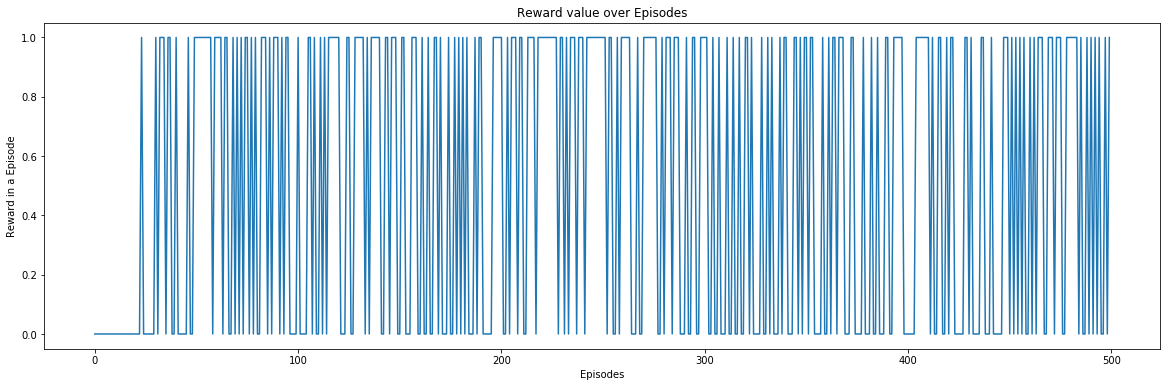

In [24]:
x = [i for i in range(0, len(rewards))]
y = rewards
plt.figure(figsize=(20, 6))
plt.plot(x, y, label='linear')
plt.xlabel('Episodes')
plt.ylabel('Reward in a Episode')
plt.title('Reward value over Episodes')
plt.savefig('fig1.png')
plt.show()

In [14]:
len(arr_rewards[0])

500

In [14]:
# Print the action in every place
env.reset()
env.render()

env_moves = list(np.argmax(qtable,axis=1).reshape(4,4).tolist())

for i in range(len(env_moves)):
    for j in range(len(env_moves[0])):
        if env_moves[i][j] == 0:
            env_moves[i][j] = 'L'
        elif env_moves[i][j] == 1:
            env_moves[i][j]= 'D'
        elif env_moves[i][j] == 2:
            env_moves[i][j] = 'R'
        else:
            env_moves[i][j] = 'U'
for row in env_moves:
    print(*row)


SFFF
FHFH
FFFH
HFFG
L U R U
L L L L
U D L L
L D D L


In [15]:
state = env.reset()
step = 0
done = False

for step in range(max_steps_count):

    # Take the action (index) that have the maximum expected future reward given that state
    action = np.argmax(qtable[state,:])
    env.render()     
    new_state, reward, done, info = env.step(action)
    if done:
        # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
        env.render()

        # We print the number of step it took.
        print("Number of steps", step)
        break
    state = new_state



SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF


In [11]:
env.close()